# Decision Tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
import data_processing
import feature_extraction

In [3]:
df = data_processing.read_all_users('geolife_trajectories')
df = data_processing.process_classes(df)
df = data_processing.drop_unlabelled(df)

[1/182] processing user 135
[2/182] processing user 132
[3/182] processing user 104
[4/182] processing user 103
[5/182] processing user 168
[6/182] processing user 157
[7/182] processing user 150
[8/182] processing user 159
[9/182] processing user 166
[10/182] processing user 161
[11/182] processing user 102
[12/182] processing user 105
[13/182] processing user 133
[14/182] processing user 134
[15/182] processing user 160
[16/182] processing user 158
[17/182] processing user 167
[18/182] processing user 151
[19/182] processing user 169
[20/182] processing user 156
[21/182] processing user 024
[22/182] processing user 023
[23/182] processing user 015
[24/182] processing user 012
[25/182] processing user 079
[26/182] processing user 046
[27/182] processing user 041
[28/182] processing user 048
[29/182] processing user 077
[30/182] processing user 083
[31/182] processing user 084
[32/182] processing user 070
[33/182] processing user 013
[34/182] processing user 014
[35/182] processing use

In [4]:
df = data_processing.create_segments(df)
df = data_processing.calculations(df)
df = data_processing.filter(df)

In [5]:
feature_df=feature_extraction.extract_features(df)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [6]:
feature_df = feature_extraction.clean_features(feature_df)

In [7]:
feature_df

,label,segment,trajectory,start_time,segment_length,total_distance,duration,mean_speed,expected_speed,top_1_speed,...,acceleration_std,HCR,SR,VCR,speed_skewness,acc_skewness,speed_kurtosis,acceleration_kurtosis,speed_autocorr,acc_autocorr
segment,,,,,,,,,,,,,,,,,,,,,
3,bike,3,20070412102116.plt,10,4,0.068010,0.064722,1.050798,1.343233,3.874367,...,0.081758,0.750000,0.750000,0.500000,1.979491,1.793881,3.928617,3.202047,-0.489260,-0.515084
4,bike,4,20070412102116.plt,14,44,2.523296,0.283056,8.914491,10.285131,26.514408,...,1.068693,0.386364,0.045455,0.068182,0.411348,5.777476,4.893587,35.905581,0.139960,-0.305496
8,bike,8,20070412134621.plt,14,22,2.244391,0.150833,14.879941,14.386680,16.278984,...,0.062032,0.181818,0.000000,0.000000,-1.904818,-0.606119,4.683206,1.055243,0.240081,-0.299067
9,bike,9,20070413005306.plt,0,38,2.051800,0.178611,11.487525,12.047576,19.428250,...,0.236898,0.447368,0.000000,0.000000,0.198838,1.306978,0.499834,2.333092,0.343581,-0.327417
10,car,10,20070413005306.plt,5,28,1.744181,0.109444,15.936682,25.946064,45.033945,...,1.412320,0.214286,0.000000,0.107143,-0.276824,0.488532,-0.916586,-0.054814,0.258793,-0.178507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,walk,25129,20111231075505.plt,8,87,0.663581,0.152778,4.343439,4.426357,22.285273,...,0.686471,0.574713,0.091954,0.068966,1.945087,-0.389536,6.503679,1.644895,0.511507,-0.055969
25130,walk,25130,20111231144437.plt,14,67,0.453766,0.091667,4.950173,4.898091,12.276887,...,0.449715,0.507463,0.029851,0.000000,0.385842,-0.469497,0.538724,3.110229,0.580192,-0.396046
25131,walk,25131,20111231144437.plt,14,4,0.015887,0.004167,3.812961,2.974794,6.219806,...,0.301281,1.000000,0.250000,0.000000,1.247159,0.766909,2.305851,1.508225,0.077268,0.127436


In [8]:
# Assuming 'label' is the column in feature_df that contains the class labels
class_counts = feature_df['label'].value_counts()

# Display the counts
print("Number of entries for each class in feature_df:")
print(class_counts)

Number of entries for each class in feature_df:
label
walk     5690
bus      2532
car      1964
bike     1837
train    1183
Name: count, dtype: int64


In [ ]:
# Separate features and labels
X = feature_df.drop(columns=['label', 'trajectory', 'segment'])  # Features
y = feature_df['label']               # Target

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=36
)



In [ ]:
# Initialize Decision Tree classifier
dt_clf = DecisionTreeClassifier(
    max_depth=None,       
    criterion='gini',    
    min_samples_split=2,
    min_samples_leaf=1, 
    random_state=36  
)

#Train
dt_clf.fit(X_train, y_train)


# Predictions
y_pred = dt_clf.predict(X_test)

# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

        bike       0.77      0.81      0.79       356
         bus       0.63      0.65      0.64       525
         car       0.60      0.58      0.59       383
       train       0.60      0.56      0.58       230
        walk       0.89      0.88      0.89      1148

    accuracy                           0.76      2642
   macro avg       0.70      0.70      0.70      2642
weighted avg       0.75      0.76      0.75      2642



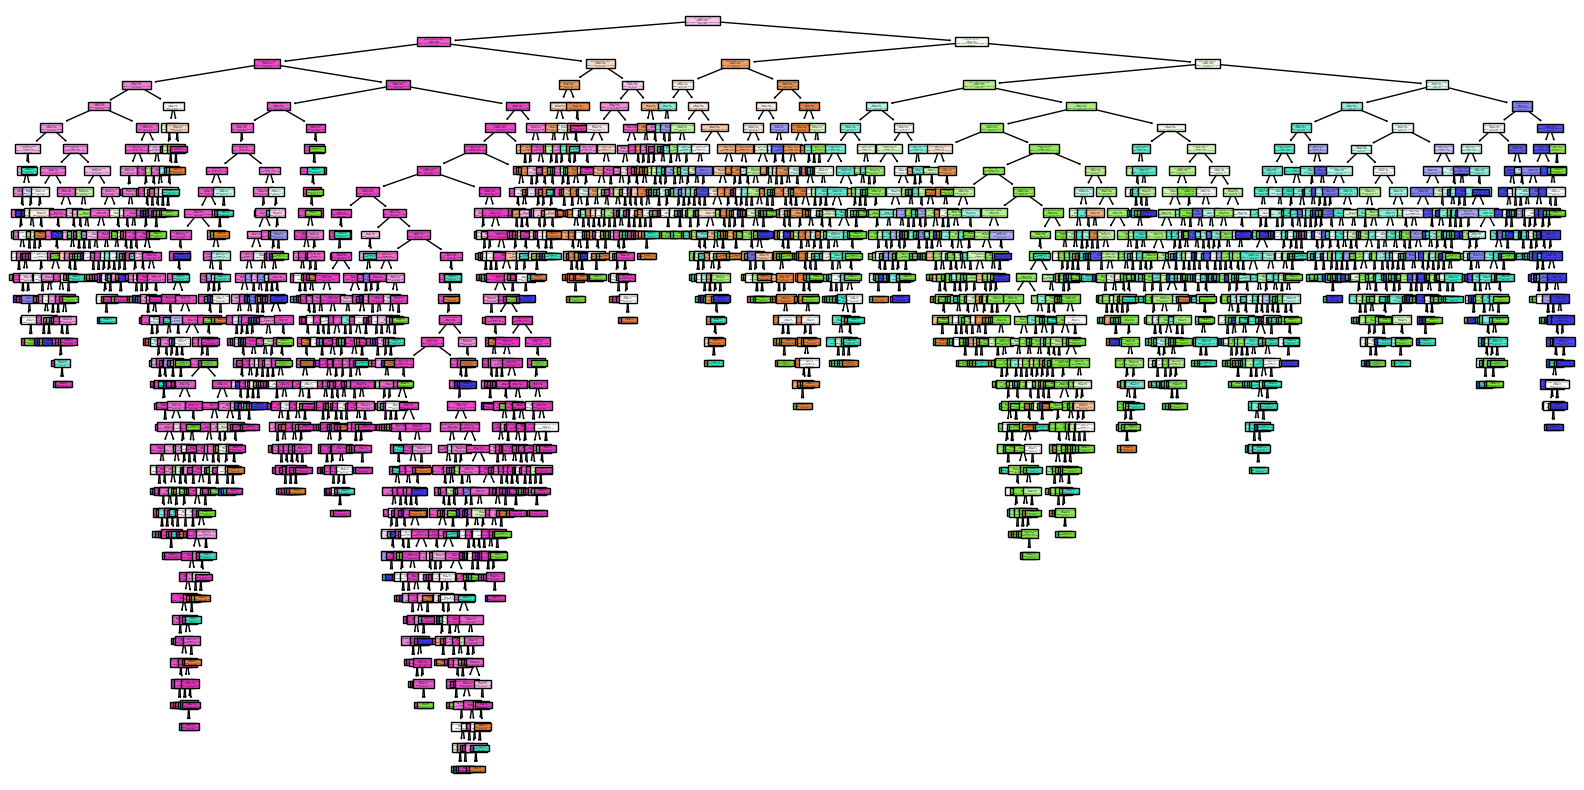

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

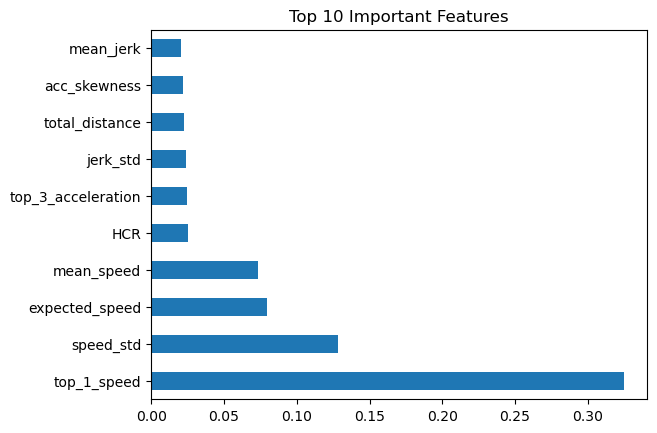

In [12]:
importances = dt_clf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=36), 
                          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

In [14]:
# Best model details
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# Evaluate on test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy with Best Model: {test_accuracy:.2f}")
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=3))

# Optional: Full CV results
cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nFull CV Results:")
print(cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.80

Test Accuracy with Best Model: 0.81

Classification Report for Best Model:
              precision    recall  f1-score   support

        bike      0.808     0.815     0.811       356
         bus      0.766     0.667     0.713       525
         car      0.652     0.640     0.646       383
       train      0.752     0.513     0.610       230
        walk      0.875     0.986     0.927      1148

    accuracy                          0.808      2642
   macro avg      0.770     0.724     0.741      2642
weighted avg      0.801     0.808     0.801      2642


Full CV Results:
                                               params  mean_test_score  \
0   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.745551   
1   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.745551   
2   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.745551   
3 

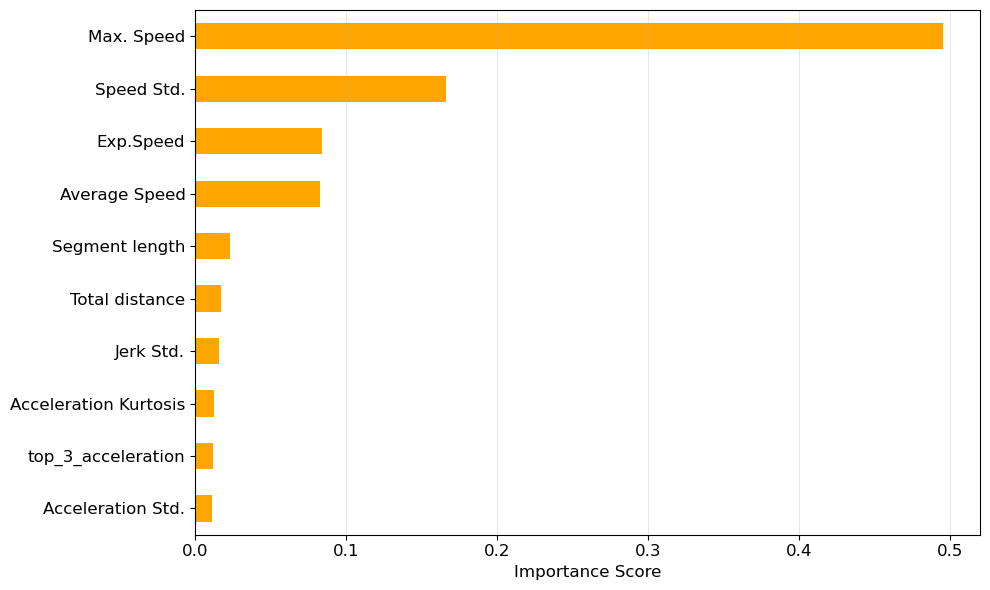

In [15]:
importances = best_dt.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

# Create custom labels dictionary (modify this with your desired labels)
custom_labels = {
    'top_1_speed': 'Max. Speed',
    'speed_std': 'Speed Std.',
    'expected_speed': 'Exp.Speed',
    'mean_speed': 'Average Speed',
    'segment_length': 'Segment length',
    'total_distance': 'Total distance',
    'jerk_std': 'Jerk Std.',
    'acceleration_std': 'Acceleration Std.',
    'acceleration_kurtosis': 'Acceleration Kurtosis',
    'speed_skewness': 'Speed Skewness',
    # ... add all features you want to rename
}

# Rename features and plot
(feat_importances.rename(custom_labels)
                .nlargest(10)
                .plot(kind='barh', 
                      color='orange',
                      figsize=(10, 6),
                      title='Top 10 Predictive Features',
                      xlabel='Feature Importance Score'))

# Customize styling
plt.gca().invert_yaxis()  # Highest importance at top
plt.grid(axis='x', alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("", fontsize=14, pad=20)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("")  # Remove default 'index' label

plt.tight_layout()
# Save the plot as an image file
plt.savefig("top_10_featuresDT.png", dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Display the plot
plt.show()

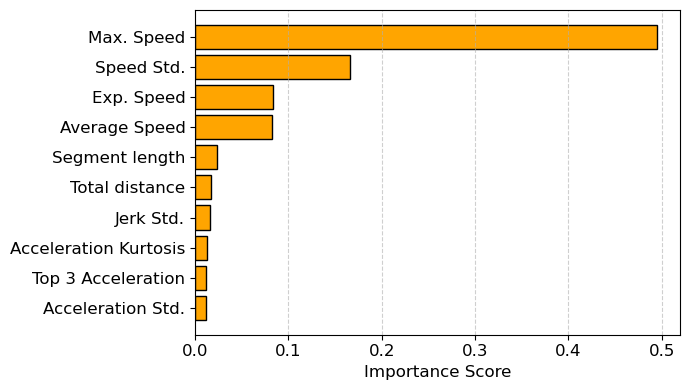

In [ ]:
top_10 = feat_importances.nlargest(10)
top_10_sorted = top_10.sort_values(ascending=True)

# Custom Labels
custom_labels = {
    'top_1_speed': 'Max. Speed',
    'speed_std': 'Speed Std.',
    'expected_speed': 'Exp. Speed', # Matched target style
    'mean_speed': 'Average Speed',
    'segment_length': 'Segment length', # Keeping your original name
    'total_distance': 'Total distance',
    'jerk_std': 'Jerk Std.',
    'acceleration_std': 'Acceleration Std.',
    'acceleration_kurtosis': 'Acceleration Kurtosis',
    'speed_skewness': 'Speed Skewness',
    'top_3_speed': 'Top 3 Speed',
    'top_2_speed': 'Top 2 Speed',
    'acc_autocorr': 'Acceleration Autocorr.',
    'top_1_acceleration': 'Max. Acceleration',
    'speed_kurtosis': 'Speed Kurtosis',
    'top_3_acceleration': 'Top 3 Acceleration',
}

pretty_labels = [custom_labels.get(feature, feature) for feature in top_10_sorted.index]


plt.figure(figsize=(7, 4)) # Set figure size similar to the target example
plt.barh(
    pretty_labels,          # Feature names (y-axis)
    top_10_sorted.values,   # Importance scores (bar lengths - x-axis)
    color='orange',         # Bar color
    edgecolor='black'       # Bar edge color
)


plt.xlabel('Importance Score', fontsize=12) 
plt.ylabel("")                            
plt.title('', fontsize=14, pad=20)         
plt.xticks(fontsize=12)                    
plt.yticks(fontsize=12)                   
plt.grid(axis='x', linestyle='--', alpha=0.6) 

plt.tight_layout() 

#  Save 
plt.savefig("Graphs/top_10_featuresDT.png", dpi=300, bbox_inches='tight')

plt.show()

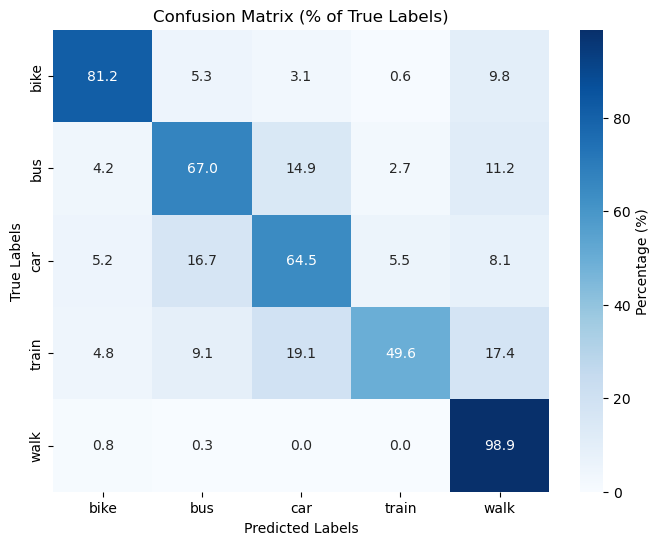

In [16]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize by true labels (rows)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Percentage (%)'})

plt.title('Confusion Matrix (% of True Labels)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
# Create DataFrame with percentage values
cm_table = pd.DataFrame(
    cm_percent.round(1),  # Rounded to 1 decimal
    index=[f"True {cls}" for cls in le.classes_],
    columns=[f"Pred {cls}" for cls in le.classes_]
)

# Format as percentage table
cm_table = cm_table.style.format("{:.1f}%").set_caption("Confusion Matrix (%)")

# Display the table
cm_table

,Pred bike,Pred bus,Pred car,Pred train,Pred walk
True bike,81.2%,5.3%,3.1%,0.6%,9.8%
True bus,4.2%,67.0%,14.9%,2.7%,11.2%
True car,5.2%,16.7%,64.5%,5.5%,8.1%
True train,4.8%,9.1%,19.1%,49.6%,17.4%
True walk,0.8%,0.3%,0.0%,0.0%,98.9%


In [18]:
# Calculate accuracy
total_accuracy = accuracy_score(y_test, y_pred)
print(f"Total Accuracy: {total_accuracy:.4f}")

Total Accuracy: 0.8089


In [19]:
from sklearn.metrics import f1_score

# Binary F1 (assuming classes are 0 and 1)
binary_f1 = f1_score(y_test, y_pred, average='macro')
print(binary_f1)

0.7410833572599488
